# Credit Card Fraud Detection

### Import Libraries

In [3]:
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install kagglehub

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub as kag
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC

In [5]:
# Download csv from kaggle
path = kag.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jnars\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [6]:
# Load csv into dataframe
df = pd.read_csv('/Users/jnars/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# This shows how many times fraud was detected; 0 meaning no fraud, 1 meaning fraud.
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# Find any nan values
nan_counts = df.isna().sum()

print(nan_counts)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
# define confusion matrix
def plot_confusion_matrix(Y,Y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(Y, Y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud']); ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud']) 
    plt.show() 

In [11]:
# Assign Features and Class to variables and split training and testing data
X = df.drop('Class', axis = 1)
Y = df['Class']

# Scaling the data so the models fit quicker
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Models

#### Logistic Regression

In [25]:
# Set Parameters for Gris Search
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength (smaller = stronger)
    'penalty': ['l2'],                      # L2 regularization (ridge)
    'solver': ['lbfgs', 'saga'],             # Solvers that support L2
    'class_weight': [None, 'balanced']       # To help with imbalanced classes
}

lr = LogisticRegression(max_iter=1000)
logreg_cv = GridSearchCV(lr, parameters, cv=10, scoring ='roc_auc', n_jobs=-1)
logreg_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01], 'class_weight': [None], 'penalty': ['l2'],
                         'solver': ['saga']},
             scoring='roc_auc')

In [30]:
# List out best parameters and the AUC score of model
print("Best parameters:", logreg_cv.best_params_)
print("Best AUC score:", logreg_cv.best_score_)

Best parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Best AUC score: 0.9834490400905194


In [79]:
# Test accuracy
accuracy_lr = logreg_cv.score(X_test_scaled, Y_test)
print('Accuracy:', accuracy_lr)

Accuracy: 0.9715131269164954


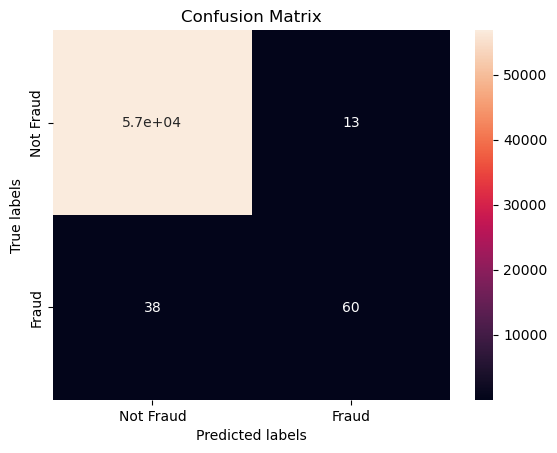

In [46]:
# Predict class and create confusion matrix
yhat=logreg_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat)

#### Decision Trees

In [29]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, parameters, n_iter=20, cv = 5, scoring = 'roc_auc', n_jobs = -1, random_state = 42)
tree_cv.fit(X_train_scaled, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='roc_auc')

In [31]:
# List out best parameters
print("Best parameters for Decision Tree:", tree_cv.best_params_)
print("Best AUC score for Decision Tree:", tree_cv.best_score_)

Best parameters for Decision Tree: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'criterion': 'entropy'}
Best AUC score for Decision Tree: 0.9272604346549516


In [75]:
# Test Accuracy
accuracy_tree = tree_cv.score(X_test_scaled, Y_test)
print('Accuracy:', accuracy_tree)

Accuracy: 0.9410501820311692


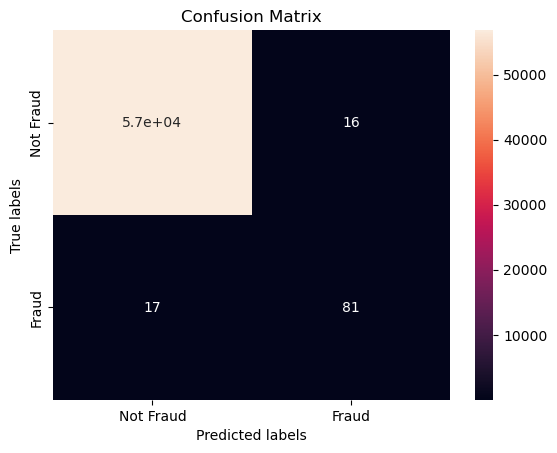

In [35]:
# Predict class and create confusion matrix
yhat=tree_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat)

#### KNN

In [45]:
parameters = {'n_neighbors': [3, 5, 7, 9],
              'algorithm': ['auto'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 3, scoring = 'roc_auc', n_jobs = -1)
knn_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2]},
             scoring='roc_auc')

In [47]:
# List Best parameters
print("Best parameters for KNN:", knn_cv.best_params_)
print("Best AUC score for KNN:", knn_cv.best_score_)

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
Best AUC score for KNN: 0.9249024462158447


In [49]:
# Test Accuracy
accuracy_knn = knn_cv.score(X_test_scaled, Y_test)
print('Accuracy:', accuracy_tree)

Accuracy: 0.9410501820311692


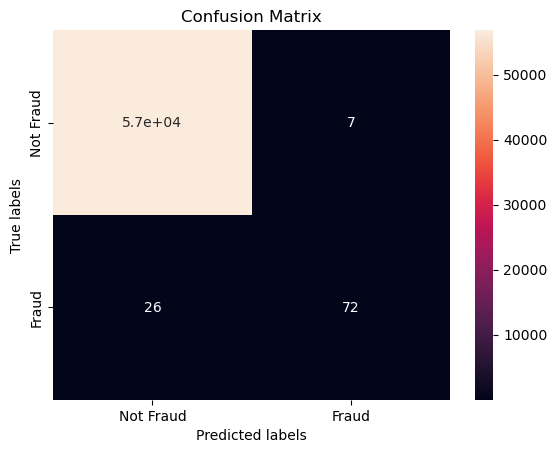

In [50]:
# Predict class and create confusion matrix
yhat=knn_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat)

#### SVM

In [65]:
# Assigning a range of parameters so grid search can select the best
parameters = {'C': np.logspace(-2, 2, 5)}

svm = LinearSVC(dual='auto', max_iter=10000)
svm_cv = GridSearchCV(svm, parameters, cv=3, scoring='roc_auc', n_jobs=-1)
svm_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=3, estimator=LinearSVC(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='roc_auc')

In [67]:
# List out best parameters and the AUC score of model
print("Best parameters:", svm_cv.best_params_)
print("Best AUC score:", svm_cv.best_score_)

Best parameters: {'C': 0.1}
Best AUC score: 0.96845761182384


In [69]:
# Test accuracy
accuracy_svm = svm_cv.score(X_test_scaled, Y_test)
print('Accuracy:', accuracy_svm)

Accuracy: 0.945491139618481


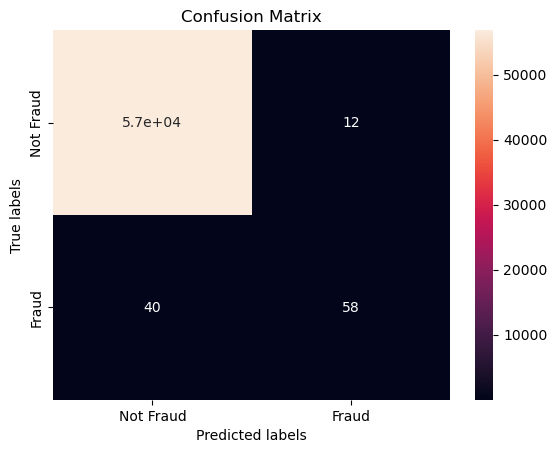

In [71]:
# Predict class and create confusion matrix
yhat=svm_cv.predict(X_test_scaled)
plot_confusion_matrix(Y_test,yhat)

## Best Model

In [81]:
print('Logistic Regression Accuracy:', accuracy_lr)
print('SVM Accuracy:', accuracy_svm)
print('Decision Trees Accuracy:', accuracy_tree)
print('KNN Accuracy:', accuracy_knn)

acc_list= {'Logistic Regression Accuracy:':accuracy_lr,
           'SVM Accuracy:':accuracy_svm,
           'Decision Trees Accuracy:':accuracy_tree,
           'KNN Accuracy:':accuracy_knn
          }
best_model = max(acc_list, key=acc_list.get)

print(f"The best model is: {best_model} with an accuracy of {acc_list[best_model]:.4f}")

Logistic Regression Accuracy: 0.9715131269164954
SVM Accuracy: 0.945491139618481
Decision Trees Accuracy: 0.9410501820311692
KNN Accuracy: 0.9436940663294018
The best model is: Logistic Regression Accuracy: with an accuracy of 0.9715
